In [8]:
from qiskit import *

nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

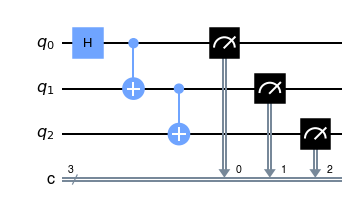

In [9]:
circuit.draw('mpl')

In [10]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 1024).result()

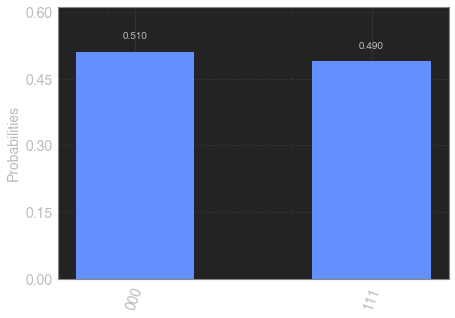

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [12]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_lima')
result = execute(circuit, backend = device, shots = 1024).result()

ibmqfactory.load_account:WARNING:2021-11-05 14:24:53,327: Credentials are already in use. The existing account in the session will be replaced.


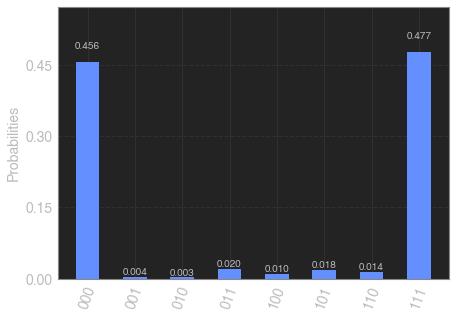

In [13]:
plot_histogram(result.get_counts(circuit))

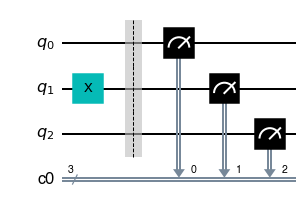

In [15]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal

cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')
cal_circuits[2].draw('mpl')

In [16]:
len(cal_circuits)

8

In [17]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, 
                  optimization_level = 0)
cal_results = cal_job.result()

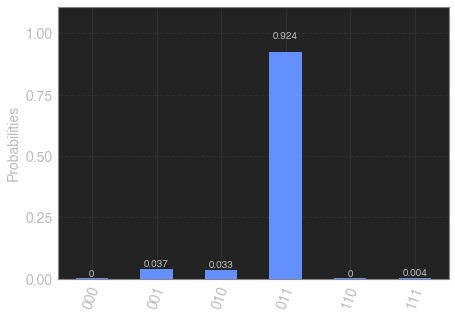

In [18]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [ ]:
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

In [ ]:
meas_fitter.plot_calibration()

In [7]:
meas_filter = meas.fitter.filter
mitigated_result = meas_filter.apply(device_result)

ibmq_qasm_simulator; qubits = simulated job = 6
ibmq_armonk; qubits = 1 job = 1
ibmq_santiago; qubits = 5 job = 651
ibmq_bogota; qubits = 5 job = 5
ibmq_lima; qubits = 5 job = 10
ibmq_belem; qubits = 5 job = 5
ibmq_quito; qubits = 5 job = 6
simulator_statevector; qubits = simulated job = 6
simulator_mps; qubits = simulated job = 6
simulator_extended_stabilizer; qubits = simulated job = 6
simulator_stabilizer; qubits = simulated job = 6
ibmq_manila; qubits = 5 job = 6


In [14]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

NameError: name 'device_result' is not defined